 # SILO API Simple Interface Examples



 This notebook demonstrates the simple, high-level interface methods in the SILO API client. These methods provide an easy way to access Australian climate data without needing to work with complex Pydantic models.



 ## Available Simple Methods



 - `get_station_data()` - Get weather station data using simple string parameters

 - `get_gridded_data()` - Get climate data for any coordinates using lat/lon

 - `search_stations()` - Search for weather stations by name or state

 - `get_recent_data()` - Quick access to recent data (last N days)



 ## Setup



 First, let's import the required libraries and set up our API client.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
import os

# Import the SILO API client
from weather_tools.silo_api import SiloAPI

# Set up plotting style
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")


Libraries imported successfully!


In [2]:
# Initialize the API client
# Note: You need to set your SILO_API_KEY environment variable or provide your email as api_key
# For this example, we'll use a placeholder - replace with your actual email

try:
    # Try to use environment variable first
    api = SiloAPI()  # Uses SILO_API_KEY environment variable
    print("✅ API client initialized using SILO_API_KEY environment variable")
except ValueError:
    # If no environment variable, use a placeholder (you should replace this with your email)
    api = SiloAPI(api_key="your_email@example.com")  # Replace with your email
    print("⚠️  API client initialized with placeholder email - replace with your actual email")
    print("   Set SILO_API_KEY environment variable or update the api_key parameter above")


✅ API client initialized using SILO_API_KEY environment variable


 ## 1. Searching for Weather Stations



 Let's start by finding weather stations. The `search_stations()` method makes it easy to find stations by name or state.

In [3]:
# Search for stations containing "Brisbane" in the name
brisbane_stations = api.search_stations(name_fragment="Brisbane")

print(f"Found {len(brisbane_stations)} stations with 'Brisbane' in the name:")
print("\nFirst 10 stations:")
print(brisbane_stations.head(10).to_string(index=False))




Found 7 stations with 'Brisbane' in the name:

First 10 stations:
 station_code                       name  latitude  longitude state  elevation
        40140                MT BRISBANE   -27.149    152.578   QLD      100.0
        40214   BRISBANE REGIONAL OFFICE   -27.478    153.031   QLD       38.0
        40215 BRISBANE BOTANICAL GARDENS   -27.483    153.033   QLD       15.0
        40216      BRISBANE SHOW GROUNDS   -27.451    153.033   QLD       16.0
        40223              BRISBANE AERO   -27.418    153.114   QLD        4.0
        40842              BRISBANE AERO   -27.392    153.129   QLD        4.5
        40913                   BRISBANE   -27.481    153.039   QLD        8.1


In [4]:
# Let's pick a specific Brisbane station for our examples
# Brisbane Airport is station 30043 - a well-known station with good data coverage
selected_station = "30043"
station_info = brisbane_stations.iloc[0]

station_name = station_info['name']
station_lat = station_info['latitude']
station_lon = station_info['longitude']
print(f"Selected station: {station_name} (Code: {selected_station})")
print(f"Location: {station_lat}°S, {station_lon}°E")


Selected station: MT BRISBANE (Code: 30043)
Location: -27.149°S, 152.578°E


 ## 2. Getting Weather Station Data



 Now let's get some historical weather data for our selected station using the `get_station_data()` method.

In [5]:
# Get weather data for January 2023
start_date = "20230101"
end_date = "20230131"
variables = ["rainfall", "max_temp", "min_temp"]

print(f"Getting weather data for station {selected_station} ({station_name})")
print(f"Date range: {start_date} to {end_date}")
print(f"Variables: {variables}")

# Get the data
station_data = api.get_station_data(
    station_code=selected_station,
    start_date=start_date,
    end_date=end_date,
    variables=variables
)

print(f"\n📊 Retrieved {len(station_data)} days of data")
print("\nFirst 5 rows:")
print(station_data.head())


Getting weather data for station 30043 (MT BRISBANE)
Date range: 20230101 to 20230131
Variables: ['rainfall', 'max_temp', 'min_temp']

📊 Retrieved 31 days of data

First 5 rows:
   station  YYYY-MM-DD  daily_rain  daily_rain_source  max_temp  \
0    30043  2023-01-01         0.0                 25      37.4   
1    30043  2023-01-02         3.2                 25      35.3   
2    30043  2023-01-03         9.3                 25      35.2   
3    30043  2023-01-04         0.8                 25      35.3   
4    30043  2023-01-05         4.4                 25      34.7   

   max_temp_source  min_temp  min_temp_source  \
0               25      24.7               25   
1               25      23.8               25   
2               25      23.8               25   
3               25      24.1               25   
4               25      24.2               25   

                                        metadata  
0  name=PROA STATION                              
1                     

In [6]:
# Let's also get the data with metadata to see what information is included
station_data_with_meta, metadata = api.get_station_data(
    station_code=selected_station,
    start_date=start_date,
    end_date=end_date,
    variables=variables,
    return_metadata=True
)

print("Metadata information:")
for key, value in metadata.items():
    print(f"  {key}: {value}")


Metadata information:
  station_code: 30043
  date_range: {'start': '20230101', 'end': '20230131'}
  variables: ['rainfall', 'max_temp', 'min_temp']
  format: csv
  dataset: PatchedPoint


 ## 3. Visualizing Station Data



 Let's create some plots to visualize the weather data we retrieved.

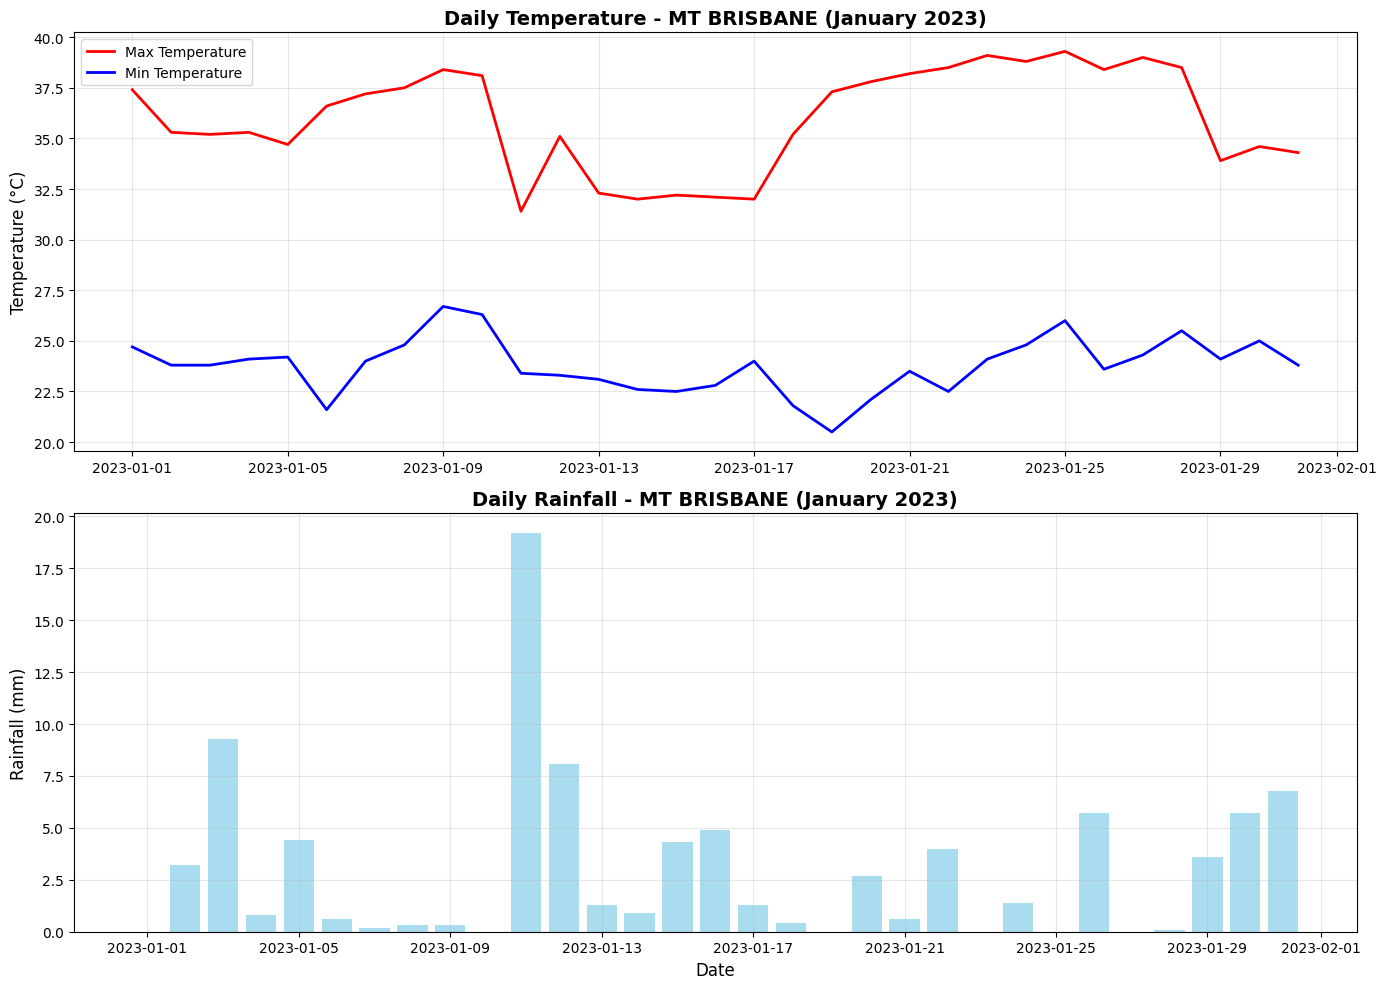


📈 Basic Statistics:
       station           YYYY-MM-DD  daily_rain  daily_rain_source   max_temp  \
count     31.0                   31   31.000000               31.0  31.000000   
mean   30043.0  2023-01-16 00:00:00    2.906452               25.0  35.990323   
min    30043.0  2023-01-01 00:00:00    0.000000               25.0  31.400000   
25%    30043.0  2023-01-08 12:00:00    0.250000               25.0  34.450000   
50%    30043.0  2023-01-16 00:00:00    1.300000               25.0  36.600000   
75%    30043.0  2023-01-23 12:00:00    4.350000               25.0  38.300000   
max    30043.0  2023-01-31 00:00:00   19.200000               25.0  39.300000   
std        0.0                  NaN    4.026325                0.0   2.530264   

       max_temp_source   min_temp  min_temp_source  
count             31.0  31.000000             31.0  
mean              25.0  23.783871             25.0  
min               25.0  20.500000             25.0  
25%               25.0  22.950000    

In [7]:
# Create plots for the station data
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Convert date column to datetime if it's not already
date_col = "YYYY-MM-DD"
station_data[date_col] = pd.to_datetime(station_data[date_col])


# Plot 1: Temperature

axes[0].plot(station_data[date_col], station_data["max_temp"], 'r-', label='Max Temperature', linewidth=2)
axes[0].plot(station_data[date_col], station_data["min_temp"], 'b-', label='Min Temperature', linewidth=2)

axes[0].set_title(f'Daily Temperature - {station_name} (January 2023)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Temperature (°C)', fontsize=12)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Rainfall
rain_cols = [col for col in station_data.columns if 'rain' in col.lower() or 'R_' in col]
if rain_cols:
    rain_col = rain_cols[0]
    axes[1].bar(station_data[date_col], station_data[rain_col], color='skyblue', alpha=0.7, width=0.8)
    axes[1].set_title(f'Daily Rainfall - {station_name} (January 2023)', fontsize=14, fontweight='bold')
    axes[1].set_ylabel('Rainfall (mm)', fontsize=12)
    axes[1].set_xlabel('Date', fontsize=12)
    axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print some basic statistics
print("\n📈 Basic Statistics:")
print(station_data.describe())


 ## 4. Getting Gridded Data for Any Coordinates



 The `get_gridded_data()` method allows you to get climate data for any latitude/longitude coordinates, even where there's no weather station.

In [8]:
# Let's get gridded data for a location near our station
# Using coordinates close to Brisbane Airport but slightly different
target_lat = -27.5
target_lon = 153.0

print(f"Getting gridded climate data for coordinates: {target_lat}°S, {target_lon}°E")
print(f"Date range: {start_date} to {end_date}")
print(f"Variables: {variables}")

# Get gridded data
gridded_data = api.get_gridded_data(
    latitude=target_lat,
    longitude=target_lon,
    start_date=start_date,
    end_date=end_date,
    variables=variables
)

print(f"\n📊 Retrieved {len(gridded_data)} days of gridded data")
print("\nFirst 5 rows:")
print(gridded_data.head())


Getting gridded climate data for coordinates: -27.5°S, 153.0°E
Date range: 20230101 to 20230131
Variables: ['rainfall', 'max_temp', 'min_temp']

📊 Retrieved 31 days of gridded data

First 5 rows:
   latitude  longitude  YYYY-MM-DD  daily_rain  daily_rain_source  max_temp  \
0     -27.5      153.0  2023-01-01         0.2                 25      29.1   
1     -27.5      153.0  2023-01-02         0.0                 25      29.5   
2     -27.5      153.0  2023-01-03         0.0                 25      31.7   
3     -27.5      153.0  2023-01-04         0.0                 25      32.7   
4     -27.5      153.0  2023-01-05        37.3                 25      27.7   

   max_temp_source  min_temp  min_temp_source  \
0               25      19.4               25   
1               25      18.2               25   
2               25      17.3               25   
3               25      19.8               25   
4               25      21.8               25   

                                  

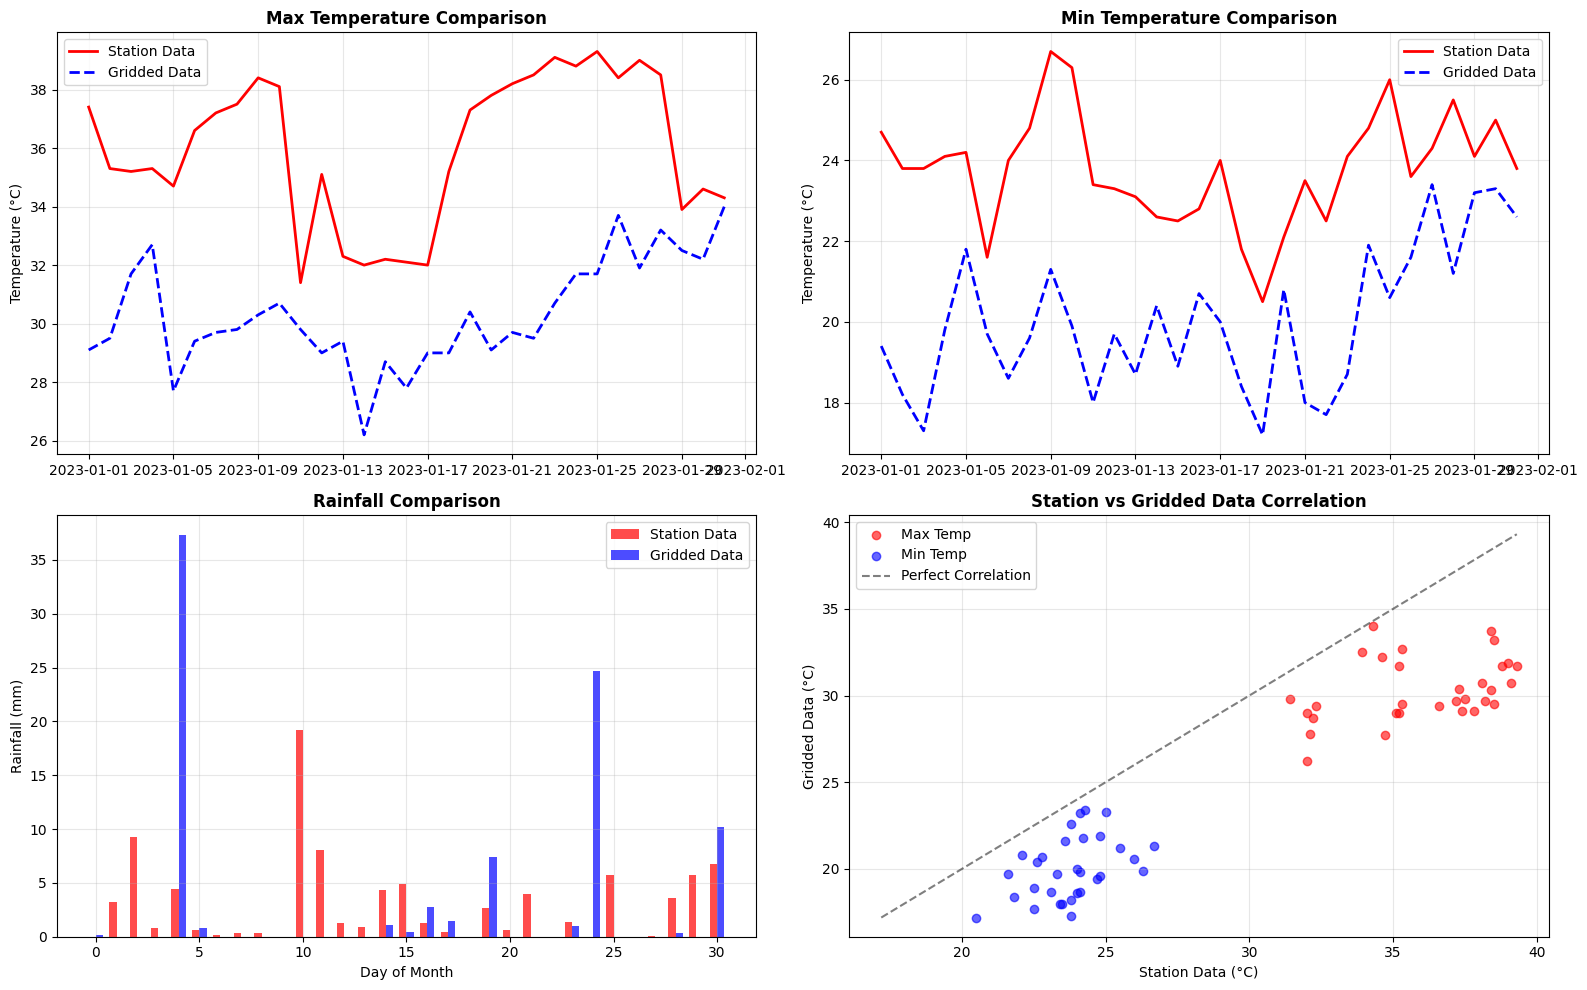


📊 Data source comparison completed!
Station location: -27.149°S, 152.578°E
Gridded location: -27.5°S, 153.0°E
Distance: ~60.9 km


In [9]:
# Compare station data vs gridded data
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Helper function to find temperature and rainfall columns
def find_columns(df, pattern):
    return [col for col in df.columns if any(p in col.lower() for p in pattern)]

# Find date columns for both datasets
date_col = "YYYY-MM-DD"
max_temp = "max_temp"
min_temp = "min_temp"

# Ensure dates are datetime
station_data[date_col] = pd.to_datetime(station_data[date_col])
gridded_data[date_col] = pd.to_datetime(gridded_data[date_col])


# Plot max temperature comparison
axes[0,0].plot(station_data[date_col], station_data[max_temp], 'r-', label='Station Data', linewidth=2)
axes[0,0].plot(gridded_data[date_col], gridded_data[max_temp], 'b--', label='Gridded Data', linewidth=2)
axes[0,0].set_title('Max Temperature Comparison', fontweight='bold')
axes[0,0].set_ylabel('Temperature (°C)')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Plot min temperature comparison
axes[0,1].plot(station_data[date_col], station_data[min_temp], 'r-', label='Station Data', linewidth=2)
axes[0,1].plot(gridded_data[date_col], gridded_data[min_temp], 'b--', label='Gridded Data', linewidth=2)
axes[0,1].set_title('Min Temperature Comparison', fontweight='bold')
axes[0,1].set_ylabel('Temperature (°C)')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)


width = 0.35
x = np.arange(len(station_data))

axes[1,0].bar(x - width/2, station_data["daily_rain"], width, label='Station Data', color='red', alpha=0.7)
axes[1,0].bar(x + width/2, gridded_data["daily_rain"], width, label='Gridded Data', color='blue', alpha=0.7)
axes[1,0].set_title('Rainfall Comparison', fontweight='bold')
axes[1,0].set_ylabel('Rainfall (mm)')
axes[1,0].set_xlabel('Day of Month')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Scatter plot showing correlation
axes[1,1].scatter(station_data[max_temp], gridded_data[max_temp], alpha=0.6, color='red', label='Max Temp')
axes[1,1].scatter(station_data[min_temp], gridded_data[min_temp], alpha=0.6, color='blue', label='Min Temp')
    
# Add diagonal line for perfect correlation
min_temp = min(station_data[min_temp].min(), gridded_data[min_temp].min())
max_temp = max(station_data[max_temp].max(), gridded_data[max_temp].max())
axes[1,1].plot([min_temp, max_temp], [min_temp, max_temp], 'k--', alpha=0.5, label='Perfect Correlation')
axes[1,1].set_title('Station vs Gridded Data Correlation', fontweight='bold')
axes[1,1].set_xlabel('Station Data (°C)')
axes[1,1].set_ylabel('Gridded Data (°C)')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Data source comparison completed!")
print(f"Station location: {station_lat}°S, {station_lon}°E")
print(f"Gridded location: {target_lat}°S, {target_lon}°E")
print(f"Distance: ~{((station_lat - target_lat)**2 + (station_lon - target_lon)**2)**0.5 * 111:.1f} km")


 ## 5. Getting Recent Data



 The `get_recent_data()` method provides a quick way to get recent weather data for the last N days.

In [10]:
# Get recent data for our selected station (last 7 days)
print(f"Getting recent data (last 7 days) for station {selected_station}")
recent_station_data = api.get_recent_data(
    station_code=selected_station,
    days=7,
    variables=["rainfall", "max_temp", "min_temp"]
)

print(f"📊 Retrieved {len(recent_station_data)} days of recent station data")
print("\nRecent station data:")
print(recent_station_data.head(10))


Getting recent data (last 7 days) for station 30043
📊 Retrieved 8 days of recent station data

Recent station data:
   station  YYYY-MM-DD  daily_rain  daily_rain_source  max_temp  \
0    30043  2025-10-11         0.4               25.0      41.1   
1    30043  2025-10-12         0.0               25.0      38.2   
2    30043  2025-10-13         1.0               25.0      38.8   
3    30043  2025-10-14         0.0               25.0      39.1   
4    30043  2025-10-15         4.0               25.0      37.6   
5    30043  2025-10-16         0.0               25.0      37.8   
6    30043  2025-10-17         0.0               25.0      36.0   
7    30043         NaN         NaN                NaN       NaN   

   max_temp_source  min_temp  min_temp_source  \
0             25.0      23.5             25.0   
1             25.0      24.0             25.0   
2             25.0      23.5             25.0   
3             25.0      24.5             25.0   
4             25.0      21.0       

In [11]:
# Get recent gridded data for our coordinates
print(f"\nGetting recent gridded data (last 7 days) for {target_lat}°S, {target_lon}°E")
recent_gridded_data = api.get_recent_data(
    latitude=target_lat,
    longitude=target_lon,
    days=7,
    variables=["rainfall", "max_temp", "min_temp"]
)

print(f"📊 Retrieved {len(recent_gridded_data)} days of recent gridded data")
print("\nRecent gridded data:")
print(recent_gridded_data.head(10))


Getting recent gridded data (last 7 days) for -27.5°S, 153.0°E
📊 Retrieved 7 days of recent gridded data

Recent gridded data:
   latitude  longitude  YYYY-MM-DD  daily_rain  daily_rain_source  max_temp  \
0     -27.5      153.0  2025-10-11         0.0                 25      31.2   
1     -27.5      153.0  2025-10-12         0.0                 25      32.9   
2     -27.5      153.0  2025-10-13         6.3                 25      30.4   
3     -27.5      153.0  2025-10-14         0.1                 25      27.1   
4     -27.5      153.0  2025-10-15         0.0                 25      28.2   
5     -27.5      153.0  2025-10-16         0.0                 25      26.9   
6     -27.5      153.0  2025-10-17         0.0                 25      26.4   

   max_temp_source  min_temp  min_temp_source  \
0               25      19.0               25   
1               25      21.3               25   
2               25      20.1               25   
3               25      20.2               

 ## 6. Data Processing and Analysis



 Let's perform some basic analysis on our data to show how easy it is to work with the DataFrames returned by the API.

 ## 7. Advanced Usage Tips



 Here are some advanced tips for using the SILO API simple interface methods effectively.

In [12]:
# Tip 1: Getting all available variables
print("💡 TIP 1: Getting all available climate variables")
print("=" * 50)

# When variables=None, all available variables are retrieved
all_vars_data = api.get_station_data(
    station_code=selected_station,
    start_date="20230101",
    end_date="20230105",  # Just a few days to keep output manageable
    variables=None  # This gets ALL available variables
)

print(f"Available columns when variables=None:")
for i, col in enumerate(all_vars_data.columns, 1):
    print(f"  {i:2d}. {col}")

print(f"\nDataFrame shape: {all_vars_data.shape[0]} rows × {all_vars_data.shape[1]} columns")


💡 TIP 1: Getting all available climate variables
Available columns when variables=None:
   1. station
   2. YYYY-MM-DD
   3. daily_rain
   4. daily_rain_source
   5. max_temp
   6. max_temp_source
   7. min_temp
   8. min_temp_source
   9. evap_pan
  10. evap_pan_source
  11. radiation
  12. radiation_source
  13. vp
  14. vp_source
  15. metadata

DataFrame shape: 8 rows × 15 columns


In [13]:
# Tip 2: Working with different time periods
print("\n💡 TIP 2: Working with different time periods")
print("=" * 50)

# Get data for different months to compare
months_data = {}
months = [
    ("January", "20230101", "20230131"),
    ("July", "20230701", "20230731")
]

for month_name, start, end in months:
    try:
        month_data = api.get_station_data(
            station_code=selected_station,
            start_date=start,
            end_date=end,
            variables=["max_temp", "min_temp", "rainfall"]
        )
        months_data[month_name] = month_data
        print(f"{month_name} 2023: {len(month_data)} days of data retrieved")
    except Exception as e:
        print(f"Error getting {month_name} data: {e}")

# Compare the months
if len(months_data) == 2:
    jan_data = months_data["January"]
    jul_data = months_data["July"]
    
    jan_max_col = find_columns(jan_data, ['max', 'T_max'])[0] if find_columns(jan_data, ['max', 'T_max']) else None
    jul_max_col = find_columns(jul_data, ['max', 'T_max'])[0] if find_columns(jul_data, ['max', 'T_max']) else None
    
    if jan_max_col and jul_max_col:
        print(f"\nSeasonal comparison:")
        print(f"  January average max temp: {jan_data[jan_max_col].mean():.1f}°C")
        print(f"  July average max temp: {jul_data[jul_max_col].mean():.1f}°C")
        print(f"  Seasonal difference: {jan_data[jan_max_col].mean() - jul_data[jul_max_col].mean():.1f}°C")



💡 TIP 2: Working with different time periods
January 2023: 31 days of data retrieved
July 2023: 31 days of data retrieved

Seasonal comparison:
  January average max temp: 36.0°C
  July average max temp: 25.8°C
  Seasonal difference: 10.2°C


In [25]:
# Tip 3: Error handling and data validation
print("\n💡 TIP 3: Error handling and data validation")
print("=" * 50)

def safe_get_station_data(api, station_code, start_date, end_date, variables=None):
    """
    Safely get station data with error handling and validation.
    """
    try:
        data = api.get_station_data(
            station_code=station_code,
            start_date=start_date,
            end_date=end_date,
            variables=variables
        )
        
        # Validate the data
        if data.empty:
            print(f"⚠️ Warning: No data returned for station {station_code}")
            return None
            
        # Check for missing values
        missing_data = safe_data.drop(columns="metadata").isnull().sum()
        if missing_data.any():
            print(f"📊 Data quality report for station {station_code}:")
            for col, missing_count in missing_data.items():
                if missing_count > 0:
                    percentage = (missing_count / len(data)) * 100
                    print(f"   {col}: {missing_count} missing values ({percentage:.1f}%)")
        else:
            print(f"✅ Data quality: No missing values found")
            
        return data
        
    except Exception as e:
        print(f"❌ Error getting data for station {station_code}: {e}")
        return None

# Test the safe function
safe_data = safe_get_station_data(
    api, 
    selected_station, 
    "20230101", 
    "20230131", 
    ["rainfall", "max_temp"]
)

if safe_data is not None:
    print(f"Successfully retrieved {len(safe_data)} days of data")



💡 TIP 3: Error handling and data validation
✅ Data quality: No missing values found
Successfully retrieved 31 days of data
